### Q-1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### Ans: 

To multiply a matrix $A$ of size $(n \times k)$ by a matrix $B $ of size $(k \times m)$, the resulting matrix $C$ will be of size $(n \times m)$. Each element $(C_{ij})$ of the resulting matrix is computed as follows:

$ C_{ij} = \sum_{l=1}^k A_{il} \cdot B_{lj}$

This involves:

- $k$ multiplications for each element $C_{ij}$ (one multiplication for each $A_{il} \cdot B_{lj}$)
- $(k-1)$ additions for each element $C_{ij}$ (to sum up the $k$ products)

For each of the $n \times m$ elements in $C$:
- There are $k$ multiplications per element.
- There are $(k-1)$ additions per element.

Thus, 

the total number of multiplications is:
**$n \times m \times k$**

the total number of additions is:
**$n \times m \times (k-1)$**

### Q-2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [4]:
import random
import time
import numpy as np
from statistics import mean, stdev

# function to multiply matrices using list of lists
def matrix_multiply_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0] * m for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            C[i][j] = sum(A[i][l] * B[l][j] for l in range(k))
    
    return C

# generate random matrices
n, k, m = 100, 100, 100
A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]

# measure time for list of lists implementation
times_l_of_l = []
for _ in range(10):
    start_time = time.time()
    C_list = matrix_multiply_list(A, B)
    end_time = time.time()
    time_ins = end_time - start_time
    times_l_of_l.append(time_ins)  

mean_time = mean(times_l_of_l)
std_ll = stdev(times_l_of_l)

print(f" Average time taken using list of lists: {mean_time:.6f} seconds")
print(f" Standard deviation of the execution time: {std_ll:.6f} seconds")

# generate random matrices for NumPy
A_np = np.random.rand(n, k)
B_np = np.random.rand(k, m)

# measure time for NumPy implementation
np_times_ = []
for _ in range(10):
    start_time = time.time()
    C_np = np.dot(A_np, B_np)
    end_time = time.time()
    time_np = end_time - start_time
    np_times_.append(time_np)  

mean_np_time = mean(np_times_)
std_np = stdev(np_times_)



print(f"Average time taken using NumPy: {mean_np_time:.6f} seconds")
print(f" Standard deviation of the execution time: {std_np:.6f} seconds")


 Average time taken using list of lists: 0.099168 seconds
 Standard deviation of the execution time: 0.023726 seconds
Average time taken using NumPy: 0.000102 seconds
 Standard deviation of the execution time: 0.000324 seconds


### Q-3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

### Q-4: What is the gradient of the following function with respect to $x$ and $y$?

### $x^2+y^3 \cdot sin(x)$

The gradient with respect to $x$ is:

$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2) + \frac{\partial}{\partial x} (y^3 \sin(x))$

$\frac{\partial f}{\partial x} = 2x + y^3 \cos(x)$

The gradient with respect to $y$ is:

$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2) + \frac{\partial}{\partial x} (y^3 \sin(x))$

$\frac{\partial f}{\partial x} = x^2 + 3y^2 \sin(x)$

### Q-5: Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [13]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute gradients using JAX
grad_f_x = grad(f, argnums=0)
grad_f_y = grad(f, argnums=1)

# Test case 1
x1 = 1.0
y1 = 2.0

# Test case 2
x2 = 5.0
y2 = 7.0

grad_x1_jax = grad_f_x(x1, y1)
grad_y1_jax = grad_f_y(x1, y1)

grad_x2_jax = grad_f_x(x2, y2)
grad_y2_jax = grad_f_y(x2, y2)

print(f"Gradient with respect to x (JAX) for test case-1: {grad_x1_jax}")
print(f"Gradient with respect to x (JAX) for test case-2: {grad_x2_jax}")

print(f"Gradient with respect to y (JAX) for test case-1: {grad_y1_jax}")
print(f"Gradient with respect to y (JAX) for test case-2: {grad_y2_jax}")



Gradient with respect to x (JAX) for test case-1: 8.322418212890625
Gradient with respect to x (JAX) for test case-2: 167.296142578125
Gradient with respect to y (JAX) for test case-1: 11.097651481628418
Gradient with respect to y (JAX) for test case-2: -115.96186828613281


### Q-6: Use sympy to confirm that you obtain the same gradient analytically.

In [32]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

# Compute gradients
grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

# Test cases
x1, y1 = 1.0, 2.0
x2, y2 = 5.0, 7.0

# Evaluate gradients at test cases
grad_x1_sympy = grad_f_x.subs({x: x1, y: y1})
grad_y1_sympy = grad_f_y.subs({x: x1, y: y1})

grad_x2_sympy = grad_f_x.subs({x: x2, y: y2})
grad_y2_sympy = grad_f_y.subs({x: x2, y: y2})

print(f"Gradient with respect to x (Sympy) for test case-1: {grad_x1_sympy}")
print(f"Gradient with respect to x (Sympy) for test case-2: {grad_x2_sympy}")

print(f"Gradient with respect to y (Sympy) for test case-1: {grad_y1_sympy}")
print(f"Gradient with respect to y (Sympy) for test case-2: {grad_y2_sympy}")


Gradient with respect to x (Sympy) for test case-1: 8.32241844694512
Gradient with respect to x (Sympy) for test case-2: 167.296129613887
Gradient with respect to y (Sympy) for test case-1: 11.0976518176948
Gradient with respect to y (Sympy) for test case-2: -115.961868375481


### Q-7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [38]:
data = {
    2022: {
        "Branch 1": {
            1: {"Name": "Charan", "Marks": {"Maths": 100, "English": 70}},
            2: {"Name": "Teja", "Marks": {"Maths": 85, "English": 80}}
        },
        "Branch 2": {
            1: {"Name": "Pushkar", "Marks": {"Maths": 90, "English": 75}},
            2: {"Name": "Kumar", "Marks": {"Maths": 80, "English": 65}}
        }
    },
    2023: {
        "Branch 1": {
            1: {"Name": "Saharsh", "Marks": {"Maths": 95, "English": 85}},
            2: {"Name": "Mithilesh", "Marks": {"Maths": 78, "English": 70}}
        },
        "Branch 2": {
            1: {"Name": "Avinash", "Marks": {"Maths": 88, "English": 80}},
            2: {"Name": "Hitesh", "Marks": {"Maths": 82, "English": 72}}
        }
    },
    2024: {
        "Branch 1": {
            1: {"Name": "Tarun", "Marks": {"Maths": 92, "English": 77}},
            2: {"Name": "Likith", "Marks": {"Maths": 89, "English": 74}}
        },
        "Branch 2": {
            1: {"Name": "Sowjanya", "Marks": {"Maths": 94, "English": 82}},
            2: {"Name": "Nandini", "Marks": {"Maths": 81, "English": 68}}
        }
    },
    2025: {
        "Branch 1": {
            1: {"Name": "Hasmitha", "Marks": {"Maths": 87, "English": 83}},
            2: {"Name": "Sri divya", "Marks": {"Maths": 76, "English": 71}}
        },
        "Branch 2": {
            1: {"Name": "Sivaram", "Marks": {"Maths": 90, "English": 78}},
            2: {"Name": "Nishitha", "Marks": {"Maths": 84, "English": 70}}
        }
    }
}



### Q-8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [39]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)


# Creating students
student1 = Student(1, "Sivaram", {"Maths": 100, "English": 70})
student2 = Student(2, "Nishitha", {"Maths": 85, "English": 80})

# Creating branches and adding students
branch1 = Branch("Branch 1")
branch1.add_student(student1)
branch1.add_student(student2)

# Creating a year and adding branches
year2022 = Year(2022)
year2022.add_branch(branch1)

# Creating the database and adding years
database = Database()
database.add_year(year2022)

first_year = database.years[0]
first_branch = first_year.branches[0]
first_student = first_branch.students[0]

# Printing details of the first student
print(f"Roll Number: {first_student.roll_number}, Name: {first_student.name}, Marks: {first_student.marks}")


Roll Number: 1, Name: Sivaram, Marks: {'Maths': 100, 'English': 70}


### Q-9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

### $y=x$, $y = x^2$, $y = x^2/100$, $y = \sin(x)$, $y = sin(x)/x$, $y = \log(x)$, $y = e^x$

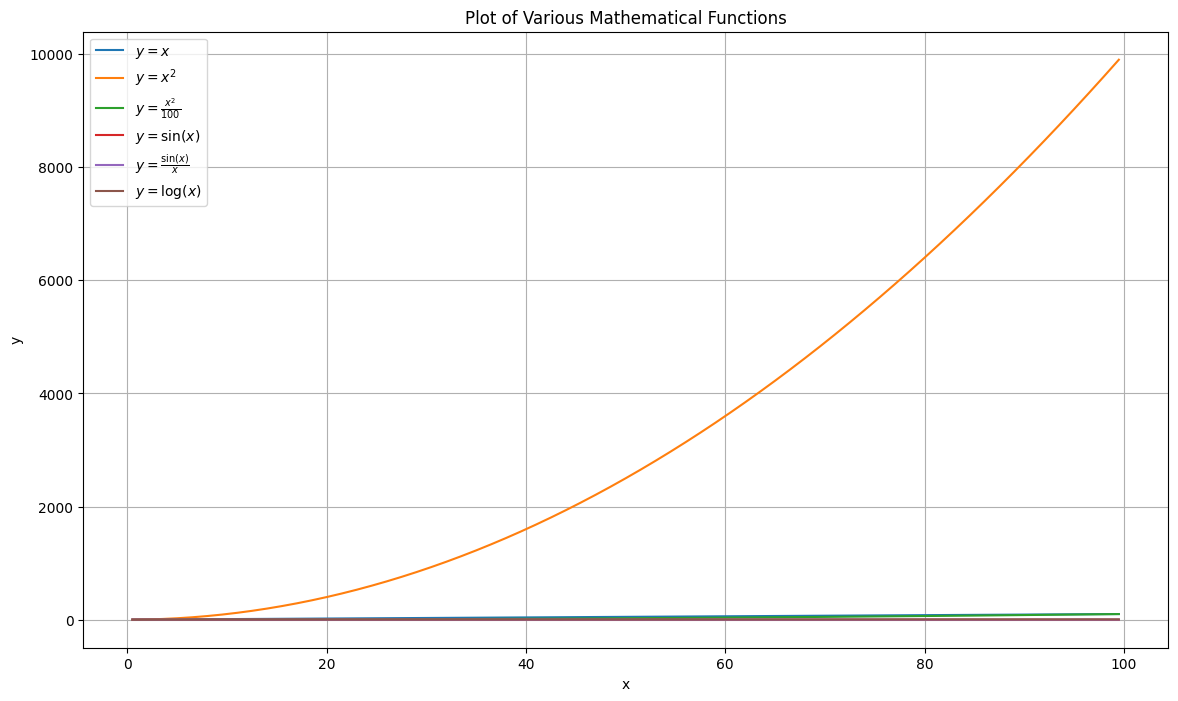

In [24]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = x**2 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)


plt.figure(figsize=(14, 8))

# Plotting each function
plt.plot(x, y1, label=r'$y = x$')
plt.plot(x, y2, label=r'$y = x^2$')
plt.plot(x, y3, label=r'$y = \frac{x^2}{100}$')
plt.plot(x, y4, label=r'$y = \sin(x)$')
plt.plot(x, y5, label=r'$y = \frac{\sin(x)}{x}$')
plt.plot(x, y6, label=r'$y = \log(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Various Mathematical Functions')
plt.legend()
plt.grid(True)
plt.show()


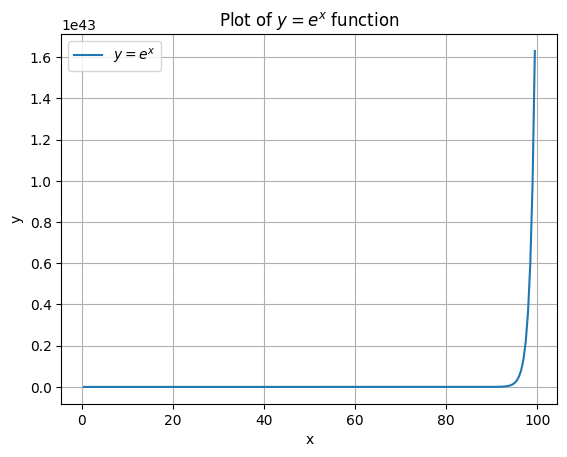

In [23]:

plt.plot(x, y7, label=r'$y = e^x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=e^x$ function')
plt.legend()
plt.grid(True)
plt.show()


### Q-10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [28]:
import pandas as pd

# Generate the matrix
np.random.seed(0)
matrix = np.random.uniform(1, 2, (20, 5))

# Create a DataFrame
columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(matrix, columns=columns)

# Find the column with the highest standard deviation
std_devs = df.std()
max_std_col = std_devs.idxmax()
max_std_value = std_devs.max()

print(f"Column with the highest standard deviation: {max_std_col}")
print(f"Standard deviation value: {max_std_value:.4f}")

# Find the row with the lowest mean
means = df.mean(axis=1)
min_mean_row_index = means.idxmin()
min_mean_value = means.min()

print(f"Row with the lowest mean: {min_mean_row_index}")
print(f"Mean value: {min_mean_value:.4f}")

print("\nDataFrame:")
print(df)


Column with the highest standard deviation: c
Standard deviation value: 0.3435
Row with the lowest mean: 15
Mean value: 1.1714

DataFrame:
           a         b         c         d         e
0   1.548814  1.715189  1.602763  1.544883  1.423655
1   1.645894  1.437587  1.891773  1.963663  1.383442
2   1.791725  1.528895  1.568045  1.925597  1.071036
3   1.087129  1.020218  1.832620  1.778157  1.870012
4   1.978618  1.799159  1.461479  1.780529  1.118274
5   1.639921  1.143353  1.944669  1.521848  1.414662
6   1.264556  1.774234  1.456150  1.568434  1.018790
7   1.617635  1.612096  1.616934  1.943748  1.681820
8   1.359508  1.437032  1.697631  1.060225  1.666767
9   1.670638  1.210383  1.128926  1.315428  1.363711
10  1.570197  1.438602  1.988374  1.102045  1.208877
11  1.161310  1.653108  1.253292  1.466311  1.244426
12  1.158970  1.110375  1.656330  1.138183  1.196582
13  1.368725  1.820993  1.097101  1.837945  1.096098
14  1.976459  1.468651  1.976761  1.604846  1.739264
15  1.039188 

### Q-11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [31]:
# Add a new column "f" which is the sum of columns
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the values in column "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# number of rows where the value in column "g" is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]

# the standard deviation of the column "f" for rows where "g" is "LT8" and "GT8" respectively
std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print(f"Number of rows where the value in column g is LT8: {lt8_count}")
print(f"Standard deviation of f where the value in column g is LT8: {std_f_lt8}")
print(f"Standard deviation of f where the value in column g is GT8: {std_f_gt8}")
print("\nDataFrame:")
print(df)


Number of rows where the value in column g is LT8: 16
Standard deviation of f where the value in column g is LT8: 0.555075090573796
Standard deviation of f where the value in column g is GT8: 0.2654357309476843

DataFrame:
           a         b         c         d         e         f    g
0   1.548814  1.715189  1.602763  1.544883  1.423655  7.835304  LT8
1   1.645894  1.437587  1.891773  1.963663  1.383442  8.322359  GT8
2   1.791725  1.528895  1.568045  1.925597  1.071036  7.885297  LT8
3   1.087129  1.020218  1.832620  1.778157  1.870012  7.588136  LT8
4   1.978618  1.799159  1.461479  1.780529  1.118274  8.138060  GT8
5   1.639921  1.143353  1.944669  1.521848  1.414662  7.664453  LT8
6   1.264556  1.774234  1.456150  1.568434  1.018790  7.082163  LT8
7   1.617635  1.612096  1.616934  1.943748  1.681820  8.472234  GT8
8   1.359508  1.437032  1.697631  1.060225  1.666767  7.221163  LT8
9   1.670638  1.210383  1.128926  1.315428  1.363711  6.689086  LT8
10  1.570197  1.438602  1.988

### Q-12: Write a small piece of code to explain broadcasting in numpy.

In [35]:
# 2D array (3x3)
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# 1D array (length 3)
B = np.array([10, 20, 30])

# Add the 1D array B to each row of the 2D array A
C = A + B

print("Array A:")
print(A)
print("\nArray B:")
print(B)
print("\nResult of A + B:")
print(C)


Array A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array B:
[10 20 30]

Result of A + B:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Explanation:
A is a 3x3 matrix.
B is a 1x3 array.
When you add A and B, NumPy automatically "stretches" B to match the shape of A. In this case, B is broadcasted across each row of A.

### Q-13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [27]:
# func to compute the argmin of a numpy array
def argmin_(arr):
    n = len(arr)
    min_ind = 0
    min_val = arr[0] 
    for i in range(1,n):
        if arr[i]<min_val:
            min_val = arr[i]
            min_ind = i
    return min_ind

arr = np.array([3.5, 1.2, 7.8, -0.5, 4.2])
min_ind = argmin_(arr)

print(f"Custom argmin index: {min_ind}")

# using argmin func for verification
min_index = np.argmin(arr)
print(f"numpy argmin index: {min_index}")
        

Custom argmin index: 3
numpy argmin index: 3
